# Start

In [1]:
import csv
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random
from helper import *
%matplotlib inline

data_object = Data_Object()

# Build the Training Data

In [2]:
data_object.add_data("training_1", augment=True, side_images=True)
data_object.add_data("training_2", augment=True, side_images=True)
data_object.add_data("recovery_1", augment=True, side_images=False)
data_object.add_data("recovery_2", augment=True, side_images=False)

data_object.print_log()


Using augmented training_1 data with side images. 
Using augmented training_2 data with side images. 
Using augmented recovery_1 data.
Using augmented recovery_2 data.
There are 36482 images in the data.


# Visualise the Data

In [ ]:
data_object.visualise_data()

# Build the Model

### Vanilla

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Cropping2D

# Start off the model
model = Sequential()

# Preprocessing - Normalise
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))

# Processing - Crop
model.add(Cropping2D(cropping=((70, 25), (0, 0))))

# Flatten before fully connected layers
model.add(Flatten())

# Layer 3 - Dense
model.add(Dense(50))

# Output Layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

data_object.add_model("vanilla")

### LeNet

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Cropping2D

# Start off the model
model = Sequential()

# Preprocessing - Normalise
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))

# Processing - Crop
model.add(Cropping2D(cropping=((70, 25), (0, 0))))

# Layer 1 - Convolution
model.add(Convolution2D(6, (5, 5), activation="relu"))
model.add(MaxPooling2D())
#model.add(Dropout(0.6))

# Layer 2 - Convolution
model.add(Convolution2D(6, (5, 5), activation="relu"))
model.add(MaxPooling2D())
#model.add(Dropout(0.6))

# Flatten before fully connected layers
model.add(Flatten())

# Layer 3 - Dense
model.add(Dense(120))

# Layer 4 - Dense
model.add(Dense(84))

# Output Layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

data_object.add_model("LeNet")

### NVIDIA

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Lambda, Dropout
from keras.layers.convolutional import Convolution2D, Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Cropping2D

# Start off the model
model = Sequential()

# Preprocessing - Normalise
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))

# Processing - Crop
model.add(Cropping2D(cropping=((70, 25), (0, 0))))

# Layer 1 - Convolution
model.add(Conv2D(24, (5, 5), activation="relu", strides=(2,2)))

# Layer 2 - Convolution
model.add(Conv2D(36, (5, 5), activation="relu", strides=(2,2)))

# Layer 3 - Convolution
model.add(Conv2D(48, (5, 5), activation="relu", strides=(2,2)))

# Layer 4 - Convolution
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Dropout(0.75))

# Layer 5 - Convolution
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Dropout(0.75))

# Flatten before fully connected layers
model.add(Flatten())

# Layer 3 - Dense
model.add(Dense(100))

# Layer 4 - Dense
model.add(Dense(50))

# Layer 4 - Dense
model.add(Dense(10))

# Output Layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

data_object.add_model("NVIDIA")

Using TensorFlow backend.


# Train the Model

### Train the Model

Train on 25537 samples, validate on 10945 samples
Epoch 1/3
25537/25537 [==============================] - 861s 34ms/step - loss: 0.0134 - val_loss: 0.0357
Epoch 2/3
25537/25537 [==============================] - 870s 34ms/step - loss: 0.0081 - val_loss: 0.0385
Epoch 3/3
25537/25537 [==============================] - 904s 35ms/step - loss: 0.0066 - val_loss: 0.0350

Using augmented training_1 data with side images. 
Using augmented training_2 data with side images. 
Using augmented recovery_1 data.
Using augmented recovery_2 data.
Using NVIDIA network.
There are 36482 images in the data.


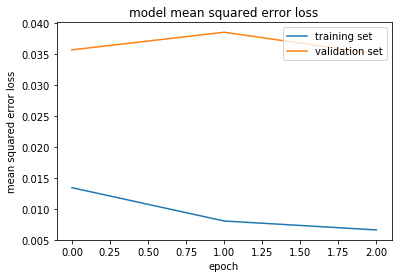

In [5]:
from keras.models import Model
import matplotlib.pyplot as plt

# Train the model
history_object = model.fit(data_object.get_x_data(), data_object.get_y_data(), epochs=3, validation_split=0.3, shuffle=True)

# Print out the data settings
data_object.print_log()

# Plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

### Save the Model

In [6]:
model.save('model.h5')